<a href="https://colab.research.google.com/github/swilsonmfc/pandas/blob/main/5_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

# Install

In [2]:
!pip install pandas-summary

# Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_summary import DataFrameSummary

# Data

![](https://images.squarespace-cdn.com/content/v1/5b071ddea2772cebc1662831/1594088524583-1KSQUNCSASC1FUPMCYW3/ke17ZwdGBToddI8pDm48kArUlhKaFD_laHEnXaCm_awUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYy7Mythp_T-mtop-vrsUOmeInPi9iDjx9w8K4ZfjXt2dncd5EDtHjJ97h5o6LlyMrSQwYs5IHGzRRGnkpX4Br8qOpYghpI-Ha_TwZsqqmJXng/abalone-vileisis+copy.jpg?format=2500w)

* The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task
* Predicting the age of abalone from physical measurements
* Other measurements, which are easier to obtain, are used to predict the age
* https://archive.ics.uci.edu/ml/datasets/Abalone


In [4]:
columns = [
  'sex',		        #nominal		M, F, and I (infant)
	'length',		      #continuous	mm	Longest shell measurement
	'diameter',	      #continuous	mm	perpendicular to length
	'height',		      #continuous	mm	with meat in shell
	'whole_weight',	  #continuous	grams	whole abalone
	'shucked_weight',	#continuous	grams	weight of meat
	'viscera_weight',	#continuous	grams	gut weight (after bleeding)
	'shell_weight',	  #continuous	grams	after being dried
	'rings',		      #integer		+1.5 gives the age in years
]

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                 names=columns)

# EDA
* Goal:
  * Extract information from data
  * Get a overview of the data 
* Use a variety of techniques to display and summarize data
  * People are good at seeing patterns
  * Use visualizations to view data
* Help form opinions & identify relationships
* Look for problems in data
  * Missing values
  * Outliers



# Overview

## Observations

In [6]:
len(df)

4177

## View

In [7]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Types

In [8]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

## Missing

In [9]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

## Extended Stats

In [10]:
dfs = DataFrameSummary(df)
dfs.columns_stats

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
counts,4177,4177,4177,4177,4177,4177,4177,4177,4177
uniques,3,134,111,51,2429,1515,880,926,28
missing,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,categorical,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


# Univariate Analysis
* Investigate:
  * What parameters describe each part of the data?
  * What does the distribution of the data look like?
  * Are there outliers or missing values in the data?
  * Does the data look normal or is it skewed?

## Boxplots

![](https://lsc.studysixsigma.com/wp-content/uploads/sites/6/2015/12/1435.png)

## Toolkits
* Addin package called DataFrameSummary
* Look at three different graphics packages
  * Matplotlib
  * Pandas (Built in)
  * Seaborn

## Length

In [11]:
# Describe returns a handful of useful properties
pd.DataFrame(df.length.describe())

,length
count,4177.000000
mean,0.523992
std,0.120093
min,0.075000
25%,0.450000
50%,0.545000
75%,0.615000
max,0.815000


mean                                                                 0.523992
std                                                                  0.120093
variance                                                            0.0144223
min                                                                     0.075
max                                                                     0.815
mode                                                                     0.55
5%                                                                      0.295
25%                                                                      0.45
50%                                                                     0.545
75%                                                                     0.615
95%                                                                      0.69
iqr                                                                     0.165
kurtosis                                                        

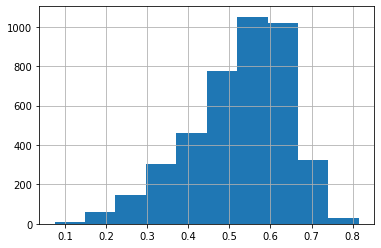

In [12]:
# Extended view of data in frame
dfs['length']

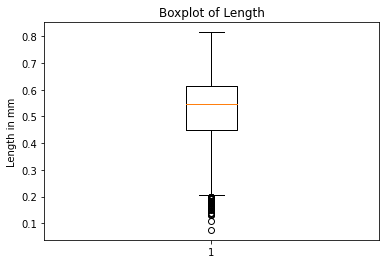

In [13]:
# Matplotlib boxplot
plt.boxplot(df.length)
plt.title('Boxplot of Length')
plt.ylabel('Length in mm');

# Helpful tips:
  # Semi-Colon on last plot statement

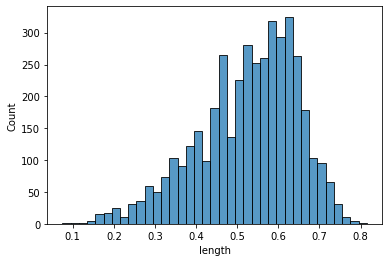

In [14]:
# Show the distribution with a histogram
sns.histplot(df, x='length');

## Diameter

In [15]:
pd.DataFrame(df.diameter.describe())

,diameter
count,4177.000000
mean,0.407881
std,0.099240
min,0.055000
25%,0.350000
50%,0.425000
75%,0.480000
max,0.650000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


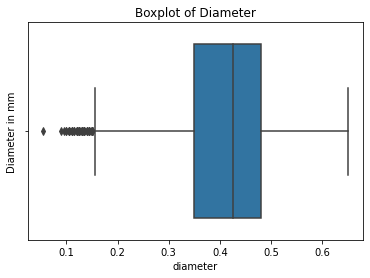

In [16]:
# Seaborn boxplot
sns.boxplot(df.diameter)
plt.title('Boxplot of Diameter')
plt.ylabel('Diameter in mm');

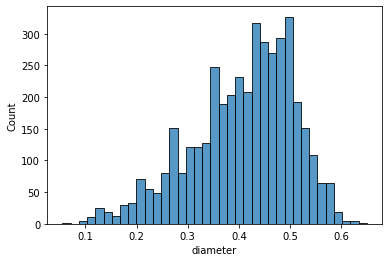

In [17]:
# Show the distribution with a histogram
sns.histplot(df, x='diameter')

## Height

In [18]:
pd.DataFrame(df.height.describe())

,height
count,4177.000000
mean,0.139516
std,0.041827
min,0.000000
25%,0.115000
50%,0.140000
75%,0.165000
max,1.130000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


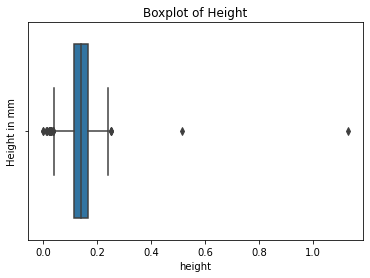

In [19]:
sns.boxplot(df.height)
plt.title('Boxplot of Height')
plt.ylabel('Height in mm');

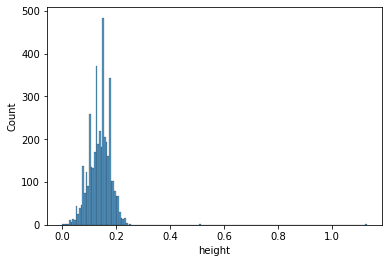

In [20]:
# Show the distribution with a histogram
# Are there outliers?
sns.histplot(df, x='height')

## Weight
* We're going to look at all three weights
  * Shell
  * Viscera
  * Shucked

In [21]:
weights = ['shell_weight', 'viscera_weight', 'shucked_weight']
pd.DataFrame(df[weights].describe())

,shell_weight,viscera_weight,shucked_weight
count,4177.000000,4177.000000,4177.000000
mean,0.238831,0.180594,0.359367
std,0.139203,0.109614,0.221963
min,0.001500,0.000500,0.001000
25%,0.130000,0.093500,0.186000
50%,0.234000,0.171000,0.336000
75%,0.329000,0.253000,0.502000
max,1.005000,0.760000,1.488000


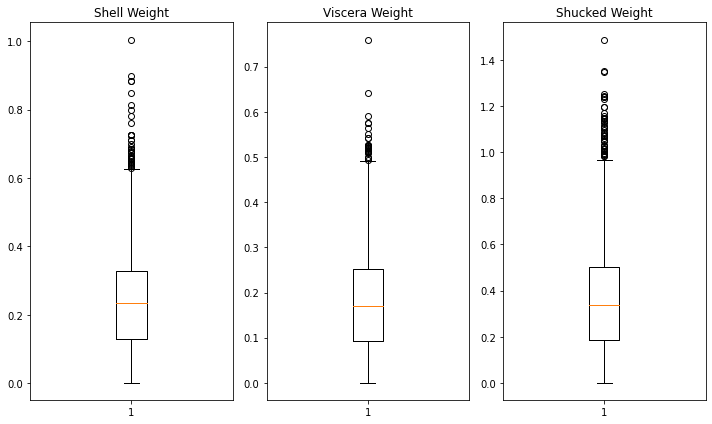

In [22]:
# We can arrange plots together using subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
axes[0].boxplot(df.shell_weight)
axes[0].set_title('Shell Weight')

axes[1].boxplot(df.viscera_weight)
axes[1].set_title('Viscera Weight')

axes[2].boxplot(df.shucked_weight)
axes[2].set_title('Shucked Weight')

fig.tight_layout()

# Helpful Tips
  #sharey / sharex

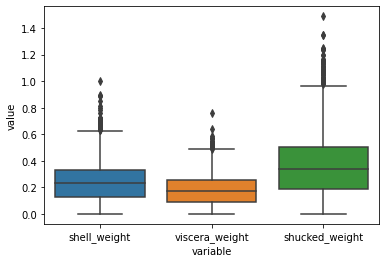

In [23]:
# Looking at a Seaborn approach (and an ideal use for melt)
sns.boxplot(x="variable", y="value", data=pd.melt(df[weights]))
plt.show()

# Helpful Tips
  # plt.figure(figsize=(10,5))

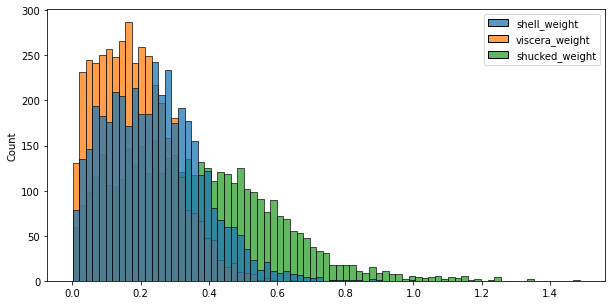

In [24]:
# Plot all values together
plt.figure(figsize=(10,5))
sns.histplot(df[weights]);

## Rings

mean                         9.93368
std                          3.22417
variance                     10.3953
min                                1
max                               29
mode                               9
5%                                 6
25%                                8
50%                                9
75%                               11
95%                               16
iqr                                3
kurtosis                     2.33069
skewness                      1.1141
sum                            41493
mad                          2.36246
cv                          0.324569
zeros_num                          0
zeros_perc                        0%
deviating_of_mean                 62
deviating_of_mean_perc         1.48%
deviating_of_median              194
deviating_of_median_perc       4.64%
top_correlations                    
counts                          4177
uniques                           28
missing                            0
m

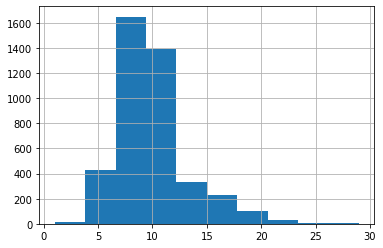

In [25]:
# Describe
# Mean - First moment - expected value of the distribution
# Variance - Second moment - The spread or variability of the distribution
# Skewness - Third central moment looks at how lopsided the distribution is (sign left / right)
# Kurtosis - Fourth central moment looks at heaviness of tails (always +)
dfs['rings']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


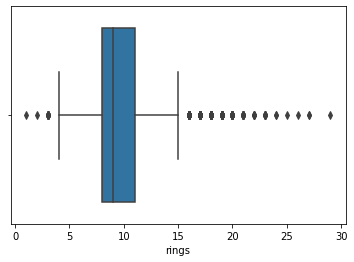

In [26]:
# Boxplot
sns.boxplot('rings', data=df)

# Univariate Analysis - Categorical

## Sex
* Categorical variable with 3 levels
* Male / Female / Infant

## Summary

In [27]:
# How many Male/Female/Infants are in the dataset
df.groupby('sex').size()

sex
F    1307
I    1342
M    1528
dtype: int64

In [28]:
# Not a lot of info in data frame summary
dfs['sex']

top                 M: 1528
counts                 4177
uniques                   3
missing                   0
missing_perc             0%
types           categorical
Name: sex, dtype: object

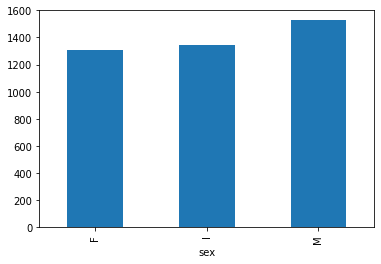

In [29]:
# Pandas has plotting capabilities built in
df.groupby('sex').size().plot.bar(); 

## Aggregations

In [30]:
# We can look at particular metrics given the category
df.groupby('sex').agg({'rings':['mean', 'median']})

rings       
          mean median
sex                  
F    11.129304     10
I     7.890462      8
M    10.705497     10

In [31]:
# We can get summary statistics over the dataset by sex
df.groupby('sex').mean()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


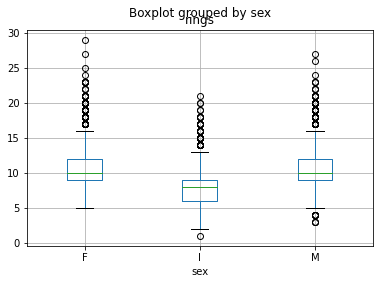

In [32]:
# Pandas - Box plot 
df.boxplot(column='rings', by='sex');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


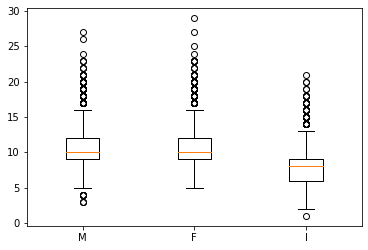

In [33]:
# Boxplots with matplotlib aren't awesome -- require some wrangling
data = []
for cat in df['sex'].unique():
  data.append({'Category': cat, 'Data': df[df.sex == cat]['rings']})
plt.boxplot([c['Data'] for c in data], 
            labels=[c['Category'] for c in data],
            );
# Helpful tips
  # notch=True
  # showmeans=True, meanline='*'

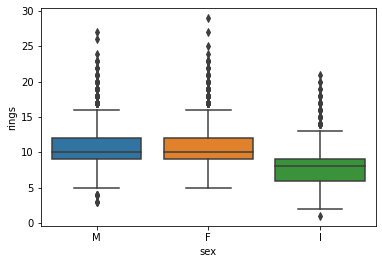

In [34]:
# Seaborn does a nice job here and very succinct
sns.boxplot(x=df.sex, y=df.rings);

# Helpful tip:
  # sns.boxplot(x='sex', y='rings', data=df)

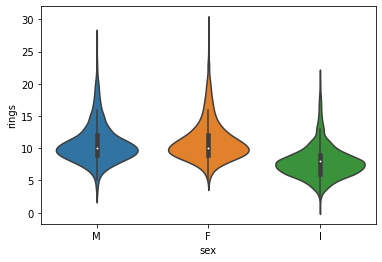

In [35]:
# A voilin plot can illustrate the data in a descriptive manner
sns.violinplot(x=df.sex, y=df.rings);

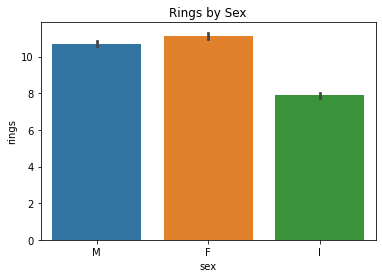

In [36]:
p = sns.barplot(x='sex', y='rings', data=df)
p.set_title('Rings by Sex');

# Multivariate Analysis
* Looking at how multiple data features interact

## Correlation
* Measures how strong a linear reelationship is between two variables
* Correlation ranges from -1 to 1
  * Positive - Strong close to 1
  * Uncorrelated - Close to 0
  * Negative - Close to -1

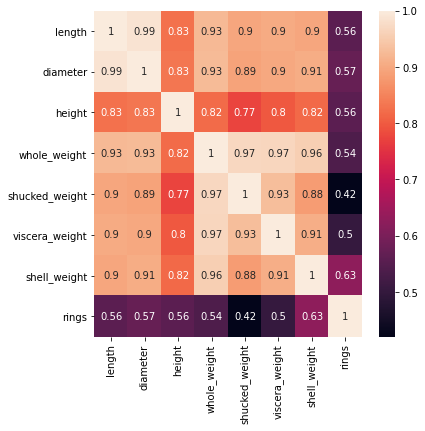

In [37]:
cor = df.corr()
plt.figure(figsize=(6,6));
sns.heatmap(cor, annot=True);

## Pair Plots

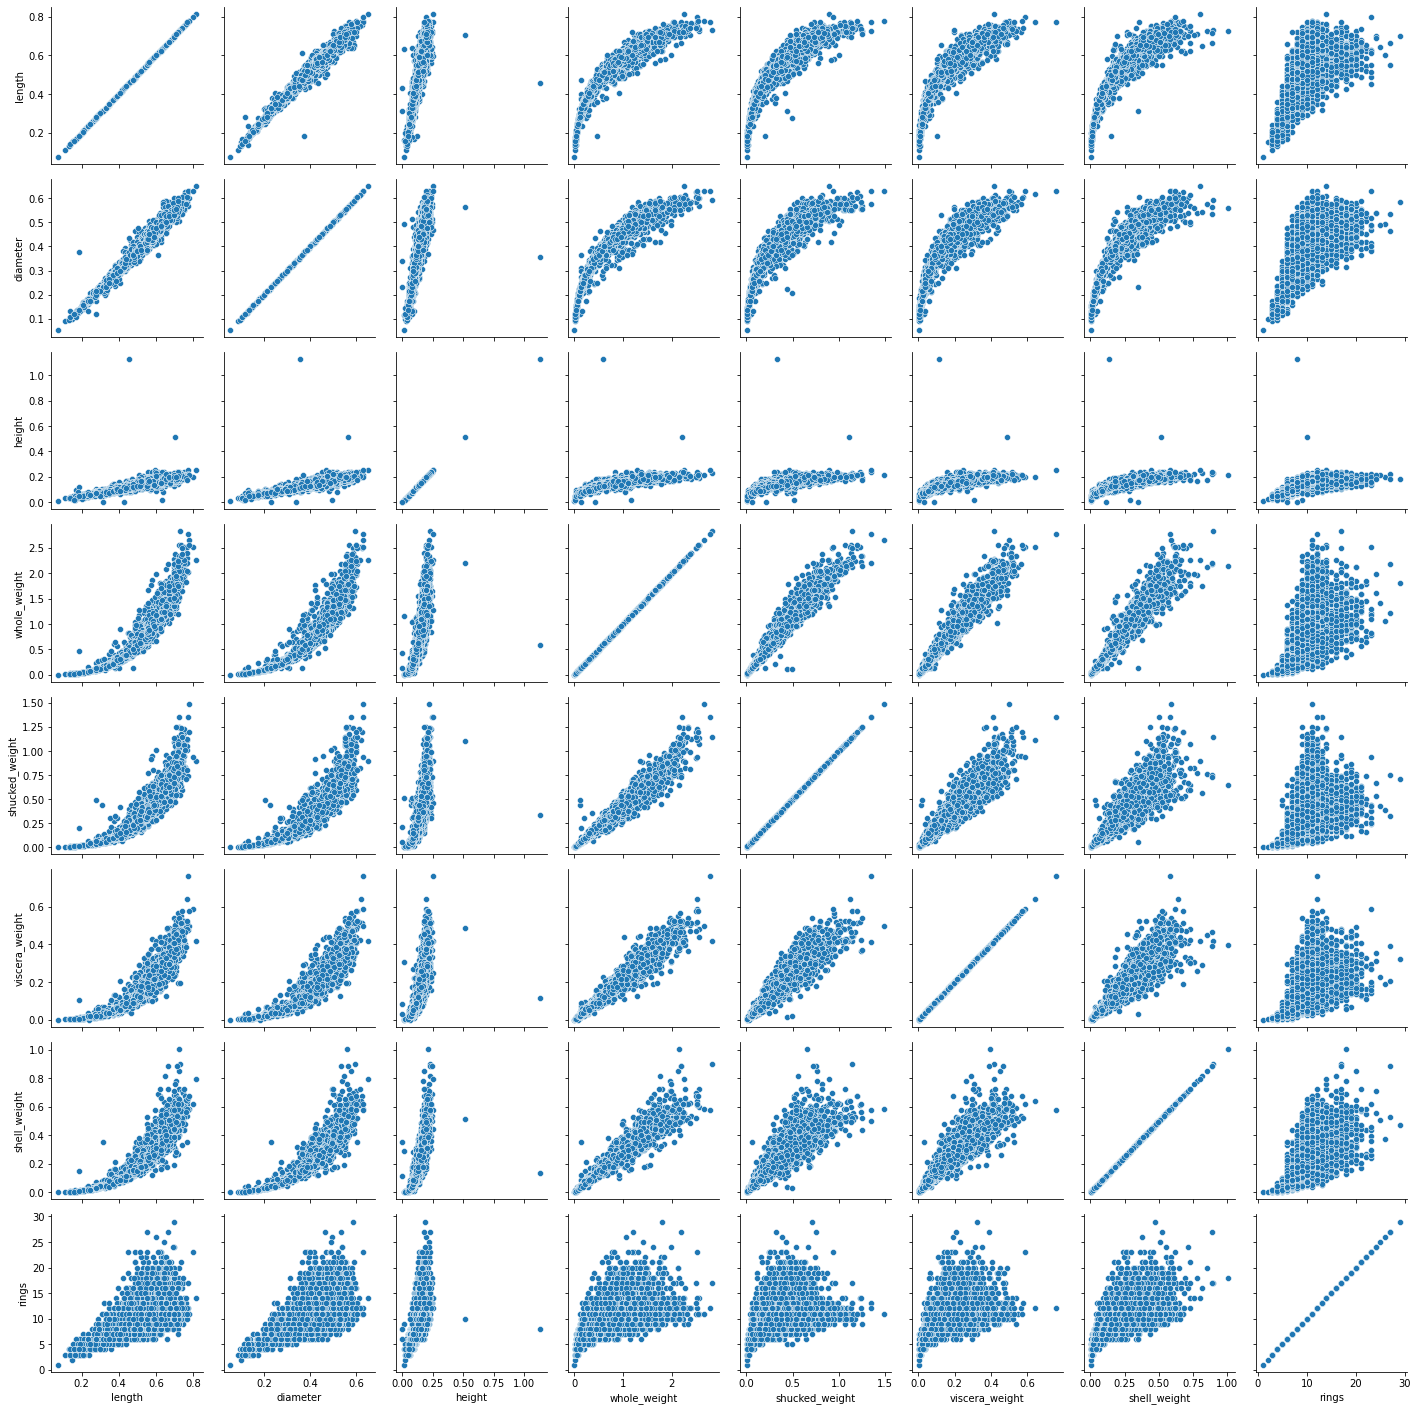

In [43]:
pg = sns.PairGrid(df)
pg.map(sns.scatterplot);

# Helpful Tips
  # You can map_upper, map_lower and map_diag independently

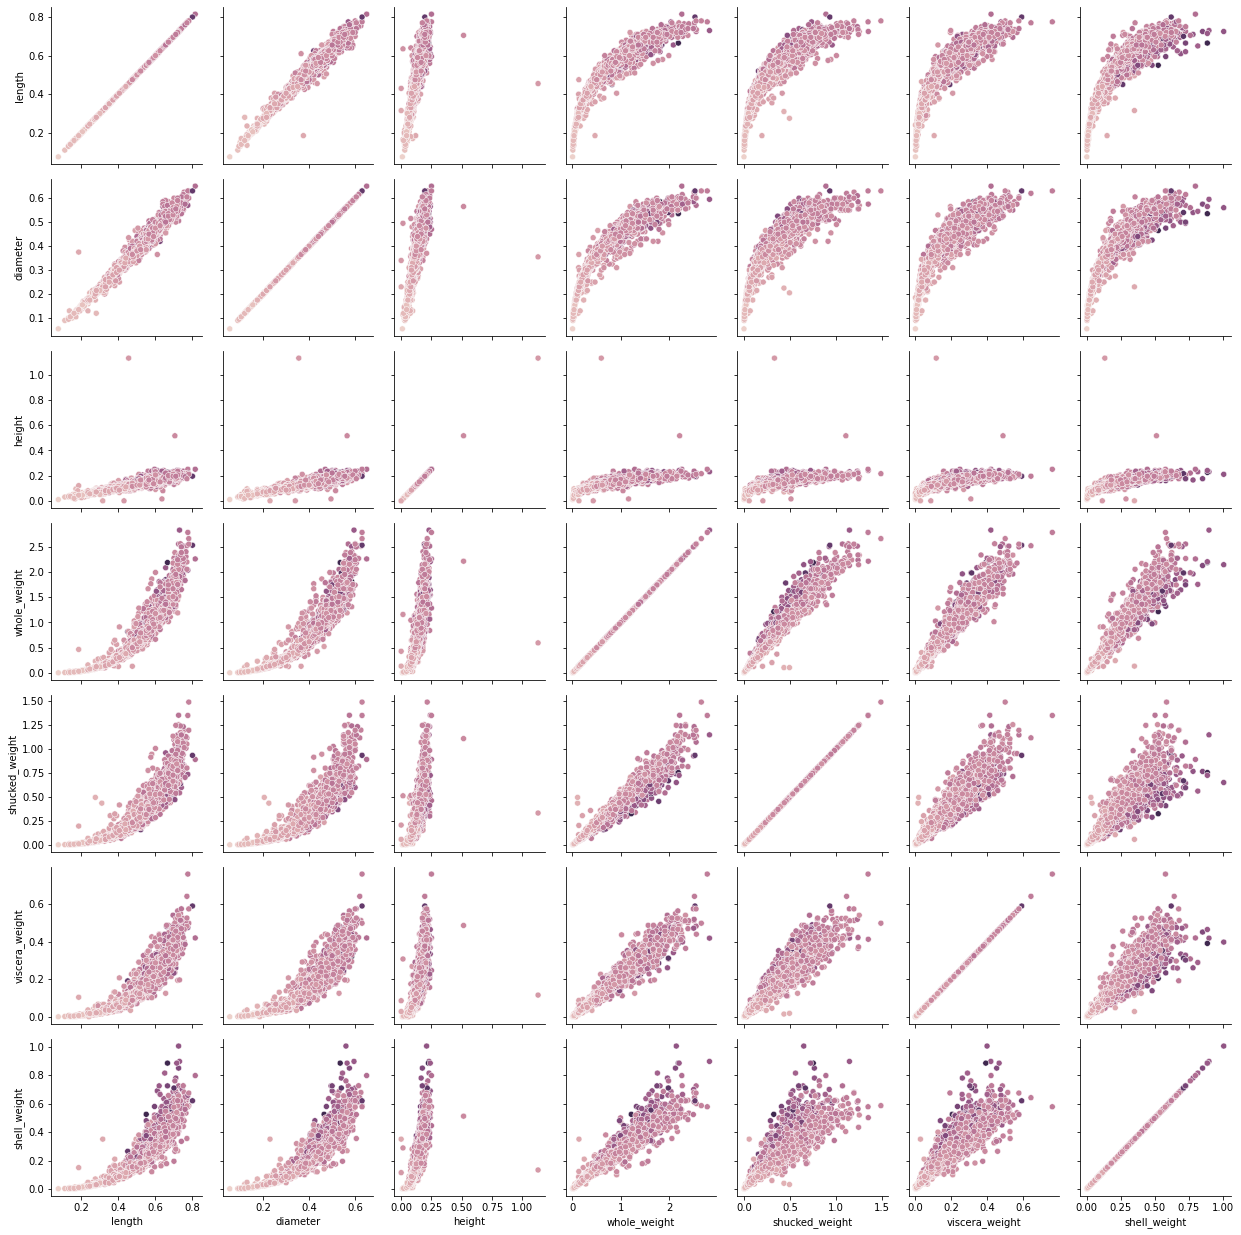

In [38]:
pg = sns.PairGrid(df, hue='rings')
pg.map(sns.scatterplot);

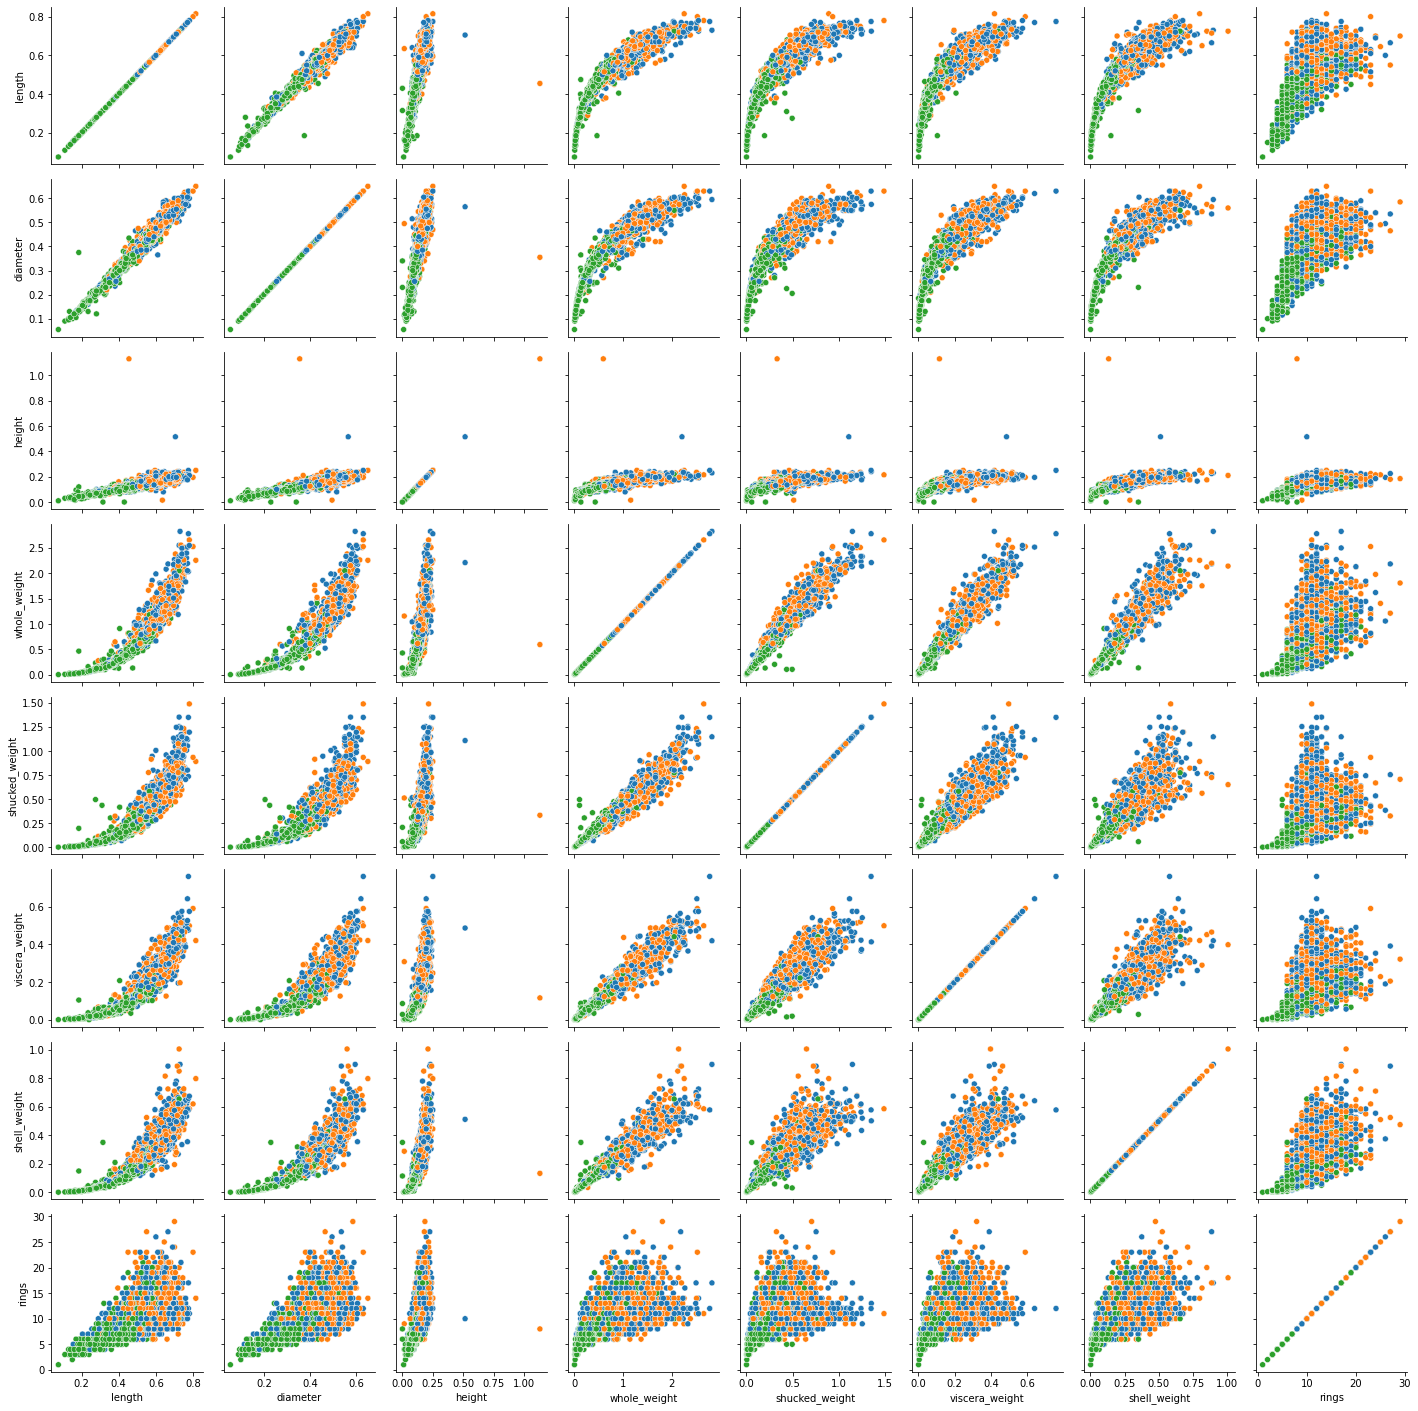

In [39]:
pg = sns.PairGrid(df, hue='sex')
pg.map(sns.scatterplot);

## Trend Lines

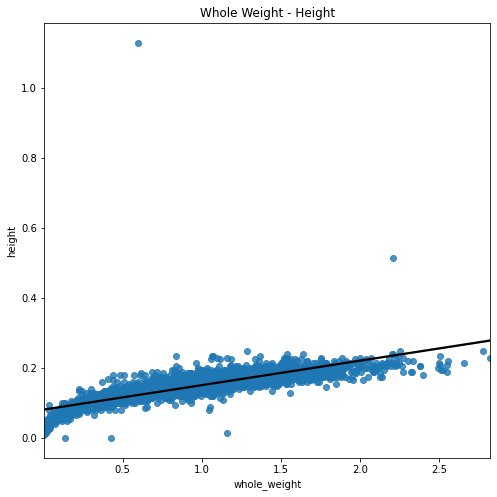

In [40]:
# Height - Whole Weight
# Adding a linear trend line
# Outliers in this plot (We'll look handling them next session)
plt.figure(figsize=(8, 8))
plt.title('Whole Weight - Height')
sns.regplot(x='whole_weight', y='height', data=df, line_kws={'color': 'black'});

# Helpful tips
  # line_kws={'color': 'black'} (Colors the line)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


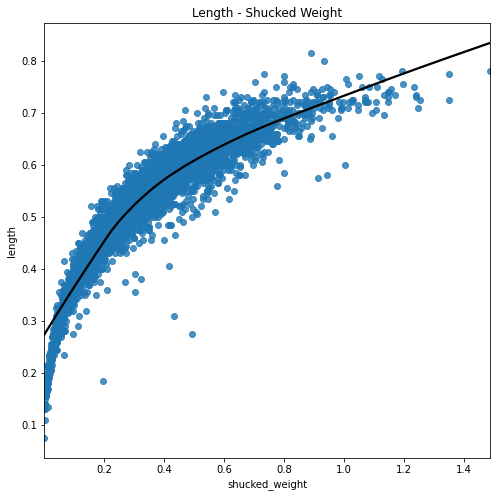

In [41]:
# Length - Shucked Weight
# Adding a linear trend line, not a great fit
plt.figure(figsize=(8, 8))
plt.title('Length - Shucked Weight')
sns.regplot(x='shucked_weight', y='length', data=df, line_kws={'color': 'black'}, lowess=True, ci=99);

# Helpful tips:
  # ci=95 (Confidence intervals for the regression)
  # lowess=True (Uses a technique called locally weioghted linear regression to smooth)

<Figure size 576x576 with 0 Axes>

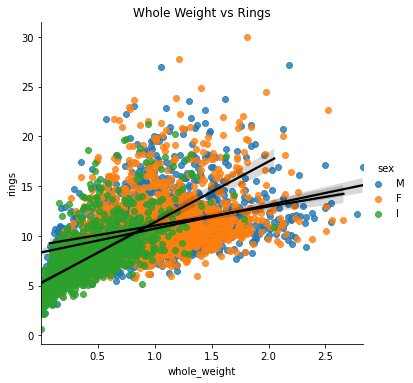

In [42]:
# What about a fit line for male, female and infant?
plt.figure(figsize=(8, 8));
sns.lmplot(x='whole_weight', y='rings', hue='sex', data=df, 
           y_jitter=True, line_kws={'color': 'black'}, ci=99)
plt.title('Whole Weight vs Rings');

# Notes
* Packages useful outside of a colab environment
  * Pandas-profiling EDA toolkit
  * Lux for intuitive visualizations